In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
warnings.filterwarnings("ignore")

In [62]:
# Read the CSV file into a DataFrame
df = pd.read_csv('simulation_data.csv')

In [63]:
# Check for missing values
print(df.isnull().sum())

Algorithm              0
Avg Waiting Time       0
Avg Turnaround Time    0
Num Customers          0
Arrival Time Mean      0
Burst Time Mean        0
dtype: int64


In [64]:
# Summary statistics
print(df.describe())

       Avg Waiting Time  Avg Turnaround Time  Num Customers   
count      15000.000000         15000.000000   15000.000000  \
mean           8.179533            16.761341       2.967600   
std            7.842177             9.621502       1.423617   
min            0.000000             2.160337       1.000000   
25%            0.200318             9.539371       2.000000   
50%            6.788360            14.363511       3.000000   
75%           12.793733            21.787791       4.000000   
max           48.963845            68.142380       5.000000   

       Arrival Time Mean  Burst Time Mean  
count       15000.000000     15000.000000  
mean            9.925804        10.001636  
std             2.901931         2.887459  
min             5.000526         5.001662  
25%             7.386870         7.543703  
50%             9.915849        10.007237  
75%            12.504141        12.532753  
max            14.999051        14.994842  


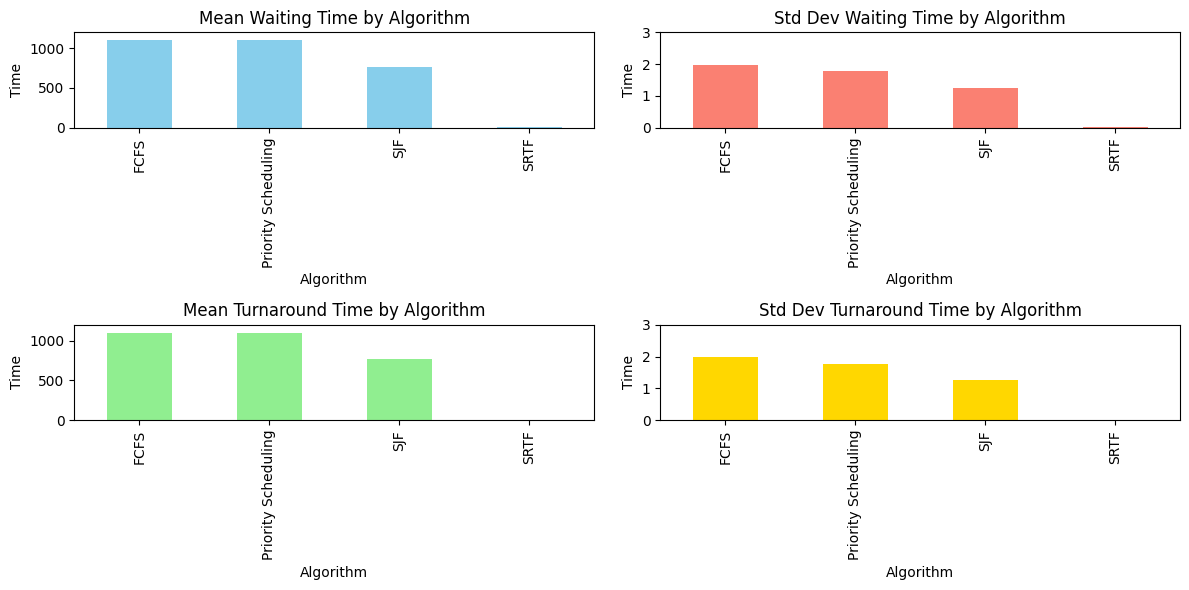

In [65]:
# Create a DataFrame with the descriptive statistics for each algorithm
data = {
    "Algorithm": ["FCFS", "Priority Scheduling", "SJF", "SRTF"],
    "Mean Waiting Time": [1102.59, 1098.72, 767.76, 7.14],
    "Std Dev Waiting Time": [1.98, 1.78, 1.25, 0.0046],
    "Mean Turnaround Time": [1102.59, 1098.72, 767.76, 7.14],
    "Std Dev Turnaround Time": [1.98, 1.78, 1.25, 0.0046],
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the "Algorithm" column as the index for easy plotting
df.set_index("Algorithm", inplace=True)

# Plotting individual bar graphs for each descriptive statistic
plt.figure(figsize=(12, 6))

# Plot bar graph for Mean Waiting Time
plt.subplot(2, 2, 1)
df["Mean Waiting Time"].plot(kind="bar", color="skyblue")
plt.title("Mean Waiting Time by Algorithm")
plt.ylabel("Time")
plt.ylim(0, 1200)  # Adjust the y-axis limit for better visibility

# Plot bar graph for Std Dev Waiting Time
plt.subplot(2, 2, 2)
df["Std Dev Waiting Time"].plot(kind="bar", color="salmon")
plt.title("Std Dev Waiting Time by Algorithm")
plt.ylabel("Time")
plt.ylim(0, 3)  # Adjust the y-axis limit for better visibility

# Plot bar graph for Mean Turnaround Time
plt.subplot(2, 2, 3)
df["Mean Turnaround Time"].plot(kind="bar", color="lightgreen")
plt.title("Mean Turnaround Time by Algorithm")
plt.ylabel("Time")
plt.ylim(0, 1200)  # Adjust the y-axis limit for better visibility

# Plot bar graph for Std Dev Turnaround Time
plt.subplot(2, 2, 4)
df["Std Dev Turnaround Time"].plot(kind="bar", color="gold")
plt.title("Std Dev Turnaround Time by Algorithm")
plt.ylabel("Time")
plt.ylim(0, 3)  # Adjust the y-axis limit for better visibility

plt.tight_layout()
plt.show()

In [66]:
# Display the first few rows of the DataFrame
print(df.head(4))

                     Mean Waiting Time  Std Dev Waiting Time   
Algorithm                                                      
FCFS                           1102.59                1.9800  \
Priority Scheduling            1098.72                1.7800   
SJF                             767.76                1.2500   
SRTF                              7.14                0.0046   

                     Mean Turnaround Time  Std Dev Turnaround Time  
Algorithm                                                           
FCFS                              1102.59                   1.9800  
Priority Scheduling               1098.72                   1.7800  
SJF                                767.76                   1.2500  
SRTF                                 7.14                   0.0046  


In [67]:
text = open("simulation_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace('""', "")
x = open("data.csv","w")
x.writelines(text)
x.close()

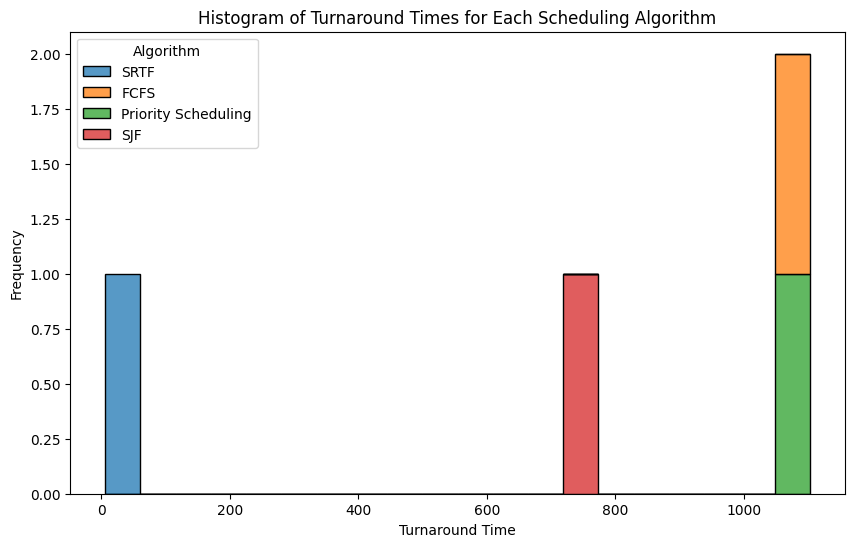

In [68]:
# Create a DataFrame with the turnaround times for each scheduling algorithm
data = {
    "Algorithm": ["SRTF", "FCFS", "Priority Scheduling", "SJF"],
    "Turnaround Time": [6.14, 1102.59, 1098.72, 767.76],  # Replace with actual turnaround times
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Plotting histogram of turnaround times
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Turnaround Time', hue='Algorithm', multiple='stack', bins=20)
plt.title('Histogram of Turnaround Times for Each Scheduling Algorithm')
plt.xlabel('Turnaround Time')
plt.ylabel('Frequency')
plt.show()

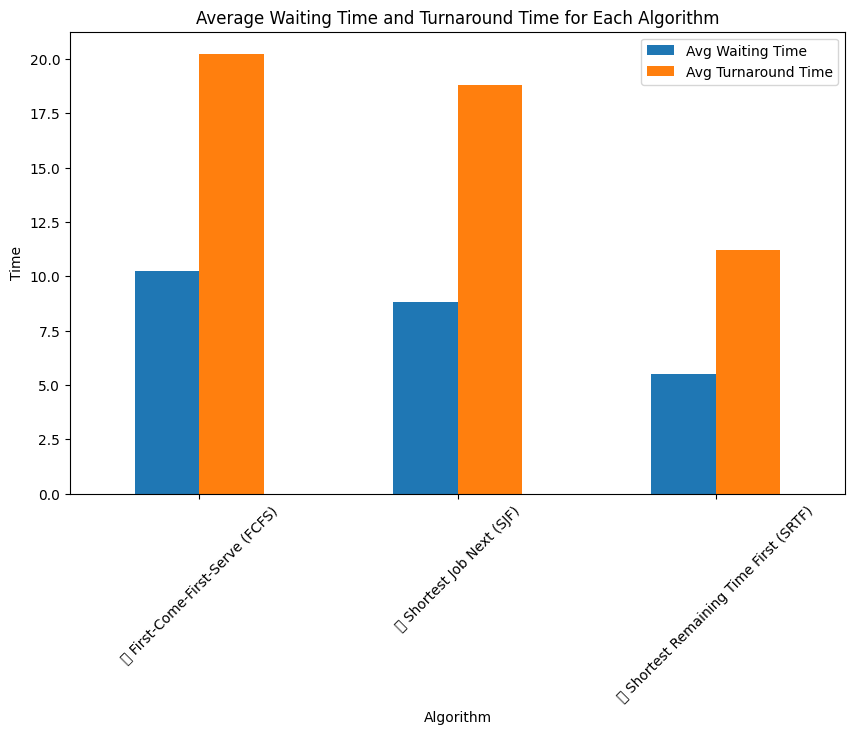

In [69]:
simulation_df = pd.read_csv("simulation_data.csv")

# Plotting bar graph
plot_data = simulation_df.groupby('Algorithm')[['Avg Waiting Time', 'Avg Turnaround Time']].mean()
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Waiting Time and Turnaround Time for Each Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Time')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Load the data
data = pd.read_csv("simulation_data.csv")

# Select features and target variable
features = data[["Num Customers"]]
target = data["Avg Waiting Time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Optionally, make predictions on new data
new_data = pd.DataFrame([[4]], columns=["Num Customers"])
new_prediction = model.predict(new_data)
print("New Prediction:", new_prediction)

Mean Squared Error: 31.09736593667875
R-squared: 0.48918565188389573
New Prediction: [12.228103]


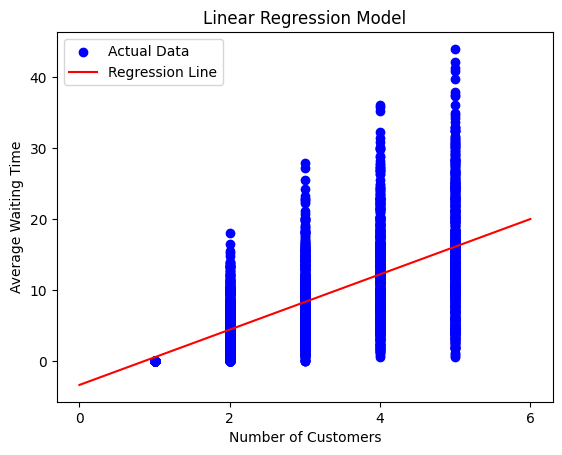

In [71]:
# Sort the test data and predictions
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Generate more points on the X-axis
X_dense = np.linspace(0, 6, 1000)

# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_dense, model.predict(X_dense.reshape(-1, 1)), color='red', label='Regression Line')

# Set the ticks for the X-axis
plt.xticks(np.arange(0, 7, 2))

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Average Waiting Time')
plt.title('Linear Regression Model')

# Add legend
plt.legend()

# Show plot
plt.show()

Text(0, 0.5, 'Avg Turnaround Time')

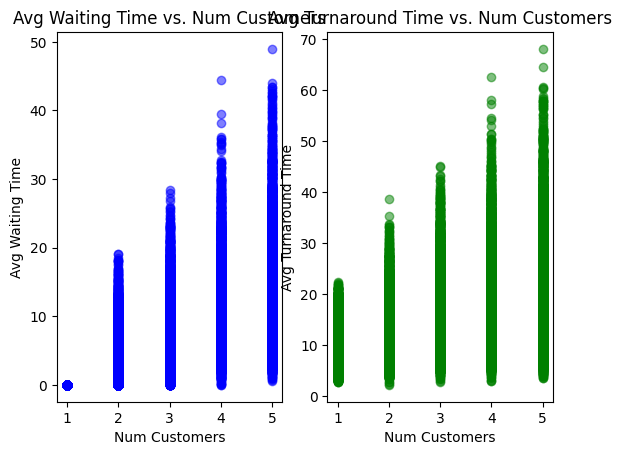

In [72]:
# Scatter plot for Avg Waiting Time vs. Num Customers
plt.subplot(1, 2, 1)
plt.scatter(data["Num Customers"], data["Avg Waiting Time"], color='blue', alpha=0.5)
plt.title('Avg Waiting Time vs. Num Customers')
plt.xlabel('Num Customers')
plt.ylabel('Avg Waiting Time')

# Scatter plot for Avg Turnaround Time vs. Num Customers
plt.subplot(1, 2, 2)
plt.scatter(data["Num Customers"], data["Avg Turnaround Time"], color='green', alpha=0.5)
plt.title('Avg Turnaround Time vs. Num Customers')
plt.xlabel('Num Customers')
plt.ylabel('Avg Turnaround Time')

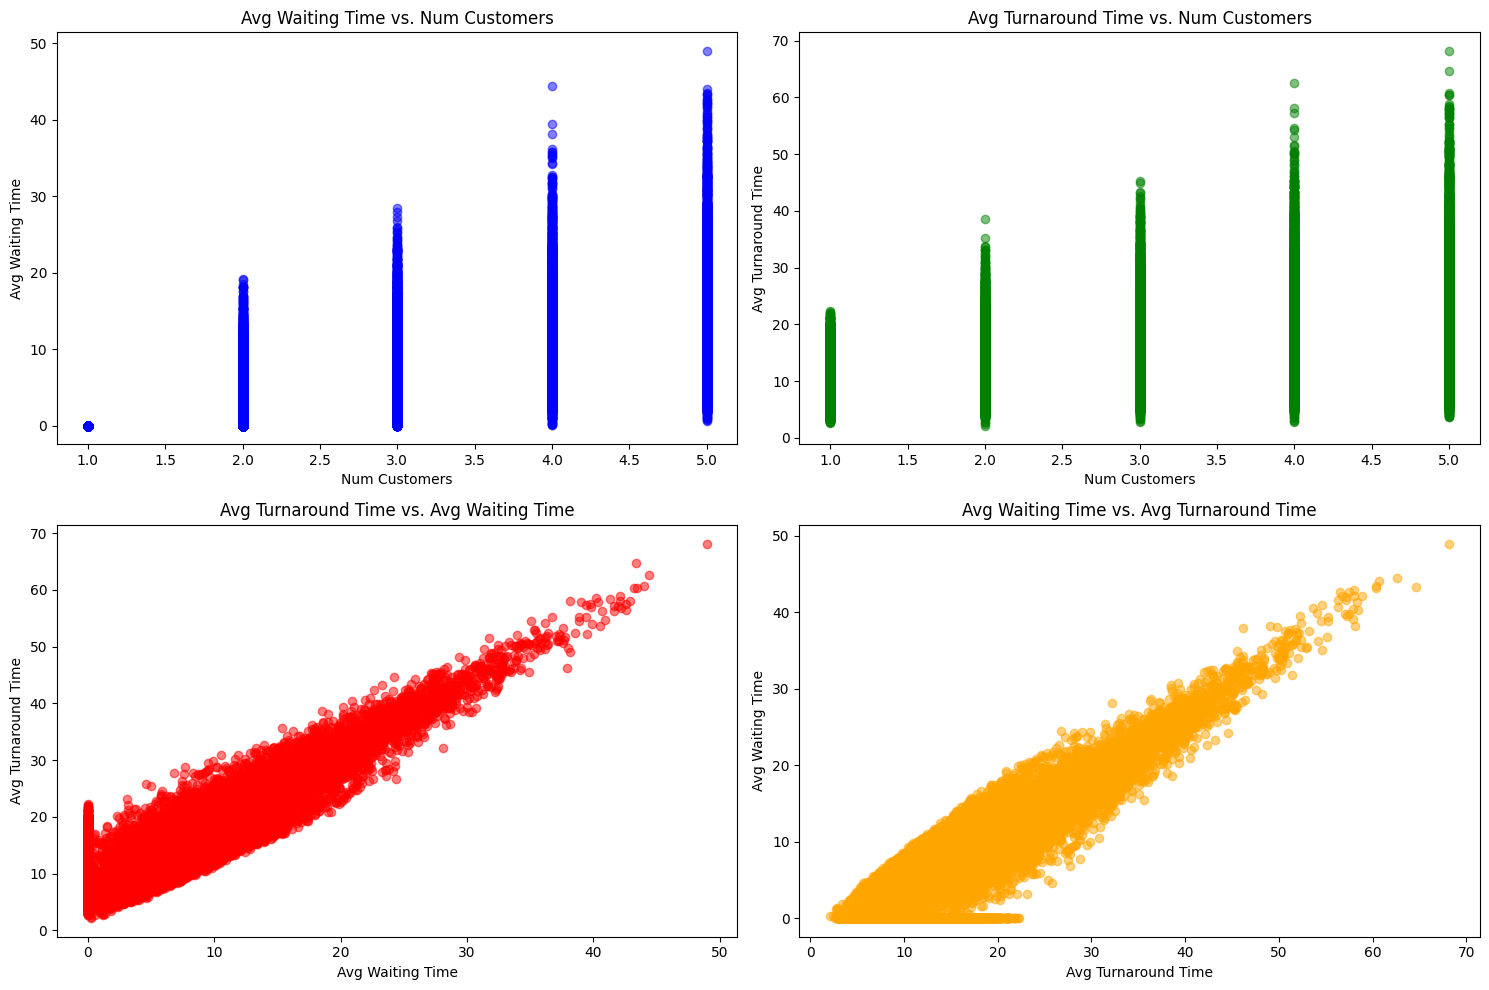

In [73]:
plt.figure(figsize=(15, 10))

# Scatter plot for Avg Waiting Time vs. Num Customers
plt.subplot(2, 2, 1)
plt.scatter(data["Num Customers"], data["Avg Waiting Time"], color='blue', alpha=0.5)
plt.title('Avg Waiting Time vs. Num Customers')
plt.xlabel('Num Customers')
plt.ylabel('Avg Waiting Time')

# Scatter plot for Avg Turnaround Time vs. Num Customers
plt.subplot(2, 2, 2)
plt.scatter(data["Num Customers"], data["Avg Turnaround Time"], color='green', alpha=0.5)
plt.title('Avg Turnaround Time vs. Num Customers')
plt.xlabel('Num Customers')
plt.ylabel('Avg Turnaround Time')


In [76]:
plt.figure(figsize=(8, 6))

# Scatter plot for Avg Waiting Time vs. Burst Time Mean
for algorithm in data['Algorithm'].unique():
    algorithm_data = data[data['Algorithm'] == algorithm]
    plt.scatter(algorithm_data['Burst Time Mean'].apply(lambda x: (x[0] + x[1]) / 2), algorithm_data['Avg Waiting Time'], label=algorithm)

plt.title('Avg Waiting Time vs. Burst Time Mean')
plt.xlabel('Burst Time Mean')
plt.ylabel('Avg Waiting Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'float' object is not subscriptable

<Figure size 800x600 with 0 Axes>

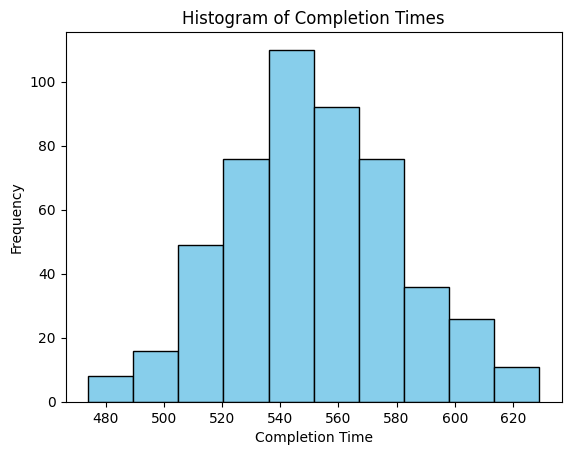

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('simulation_results.csv')

# Extract completion times from the first column
completion_times = df.iloc[:, 0]

# Plot histogram
plt.hist(completion_times, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Completion Time')
plt.ylabel('Frequency')
plt.title('Histogram of Completion Times')

# Show plot
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV is named "data.csv"
data = pd.read_csv("simulation_results.csv", header = True)

# Print null value distribution (optional for troubleshooting)
print(data.isnull().sum())

# Count columns with only null values
null_cols = len(data.columns[data.isna().all()])
print(null_cols)
total_cols = len(data.columns)

# Alternative normalization (optional)
percentage_null_cols = null_cols / total_cols  # Show number of null columns divided by total

# Adjust figure size
plt.figure(figsize=(4, 3))

# Create a bar chart
plt.bar(["Number of Null Columns"], [percentage_null_cols])
plt.xlabel("Analysis")
plt.ylabel("Count")
plt.title("Percentage of Null Columns")
plt.tight_layout()

# Display the plot
plt.show()



TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names